In [339]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  # train test data
from sklearn.linear_model import LinearRegression  # import prediction model
from sklearn.metrics import mean_squared_error # evaluation of model
from collections import OrderedDict # dict subclass that remembers theorder entries were added
from collections import OrderedDict # dict subclass that remembers the order entries were added
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
#%matplotlib inline

In [340]:
# Importing the dataset

df = pd.read_excel('./Folkhalsomyndigheten_Covid19.xlsx')
df = df[(df['ID'] > 332) & (df['ID'] < 364)]
df.head()

,ID,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
332,333,2021-01-01,2618,31,20,20,33,18,3,25,...,239,5,85,12,13,13,68,716,70,138
333,334,2021-01-02,2532,20,9,9,27,44,7,23,...,760,40,128,14,36,4,0,949,92,55
334,335,2021-01-03,2755,184,211,7,10,30,95,272,...,161,97,78,111,7,163,4,813,84,67
335,336,2021-01-04,6984,11,28,23,263,930,9,50,...,1094,59,83,15,180,40,249,651,152,420
336,337,2021-01-05,7546,284,236,36,303,431,119,432,...,1314,297,314,89,142,238,171,725,116,267


In [341]:
df.shape

(31, 24)

In [342]:
df.columns

Index(['ID', 'Statistikdatum', 'Totalt_antal_fall', 'Blekinge', 'Dalarna',
       'Gotland', 'Gävleborg', 'Halland', 'Jämtland_Härjedalen', 'Jönköping',
       'Kalmar', 'Kronoberg', 'Norrbotten', 'Skåne', 'Stockholm', 'Sörmland',
       'Uppsala', 'Värmland', 'Västerbotten', 'Västernorrland', 'Västmanland',
       'Västra_Götaland', 'Örebro', 'Östergötland'],
      dtype='object')

In [343]:
df.isnull().sum()

ID                     0
Statistikdatum         0
Totalt_antal_fall      0
Blekinge               0
Dalarna                0
Gotland                0
Gävleborg              0
Halland                0
Jämtland_Härjedalen    0
Jönköping              0
Kalmar                 0
Kronoberg              0
Norrbotten             0
Skåne                  0
Stockholm              0
Sörmland               0
Uppsala                0
Värmland               0
Västerbotten           0
Västernorrland         0
Västmanland            0
Västra_Götaland        0
Örebro                 0
Östergötland           0
dtype: int64

In [344]:
df.describe()

,ID,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,348.000000,3879.161290,72.225806,77.903226,11.580645,93.580645,196.838710,40.032258,155.387097,96.548387,...,573.258065,72.193548,108.225806,48.000000,62.548387,83.096774,86.709677,764.580645,87.322581,174.612903
std,9.092121,1800.557212,72.901170,64.037674,10.239708,76.276154,192.402373,35.604760,109.594001,58.288271,...,336.836555,61.502531,65.598125,32.329553,48.531666,61.992126,76.223003,383.837793,37.817445,103.267509
min,333.000000,1148.000000,1.000000,6.000000,0.000000,6.000000,10.000000,0.000000,7.000000,13.000000,...,117.000000,2.000000,1.000000,8.000000,1.000000,0.000000,0.000000,153.000000,29.000000,38.000000
25%,340.500000,2371.000000,19.000000,22.000000,3.500000,30.000000,42.500000,10.000000,31.500000,51.500000,...,275.500000,34.000000,63.500000,17.000000,13.000000,42.000000,25.500000,462.000000,60.000000,94.000000
50%,348.000000,4190.000000,50.000000,58.000000,10.000000,86.000000,203.000000,33.000000,168.000000,86.000000,...,545.000000,60.000000,100.000000,44.000000,64.000000,76.000000,68.000000,755.000000,83.000000,182.000000
75%,355.500000,4849.000000,108.000000,114.000000,18.000000,139.000000,273.000000,51.500000,218.000000,146.000000,...,790.000000,103.000000,138.500000,66.500000,92.000000,113.500000,124.500000,944.000000,105.000000,213.000000
max,363.000000,7546.000000,284.000000,236.000000,36.000000,303.000000,930.000000,119.000000,432.000000,254.000000,...,1314.000000,297.000000,314.000000,130.000000,180.000000,239.000000,323.000000,2056.000000,176.000000,427.000000


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 332 to 362
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   31 non-null     int64         
 1   Statistikdatum       31 non-null     datetime64[ns]
 2   Totalt_antal_fall    31 non-null     int64         
 3   Blekinge             31 non-null     int64         
 4   Dalarna              31 non-null     int64         
 5   Gotland              31 non-null     int64         
 6   Gävleborg            31 non-null     int64         
 7   Halland              31 non-null     int64         
 8   Jämtland_Härjedalen  31 non-null     int64         
 9   Jönköping            31 non-null     int64         
 10  Kalmar               31 non-null     int64         
 11  Kronoberg            31 non-null     int64         
 12  Norrbotten           31 non-null     int64         
 13  Skåne                31 non-null  

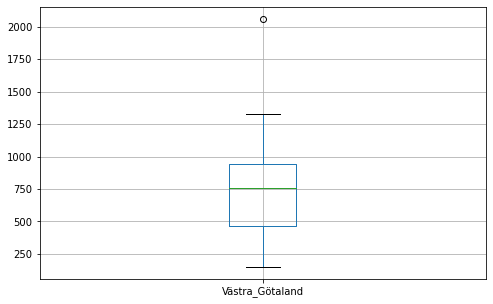

In [346]:
fig, ax = plt.subplots(figsize=(8,5))
df.boxplot(column ='Västra_Götaland')

In [347]:
df.Totalt_antal_fall.value_counts()

4737    2
1165    1
3724    1
5698    1
2755    1
6597    1
2374    1
2119    1
6984    1
4748    1
4109    1
2318    1
2618    1
4950    1
2695    1
4261    1
5341    1
4190    1
1887    1
1250    1
2532    1
5029    1
4648    1
4203    1
7152    1
4209    1
2162    1
7546    1
1148    1
2368    1
Name: Totalt_antal_fall, dtype: int64

In [348]:
#Print('-'*30); print('PREPARE DATA'); print('-'*30)
#x = np.array(df['ID']).reshape(-1, 1)
#y = np.array(df['Totalt_antal_fall']).reshape(-1, 1)
#plt.plot(y, '-m')
#plt.show()

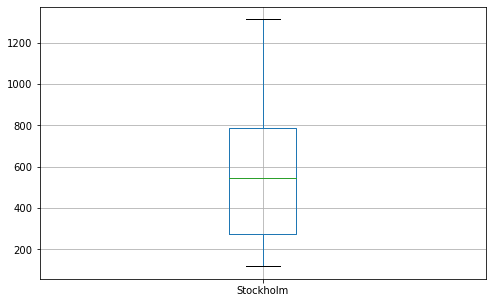

In [349]:
fig, ax = plt.subplots(figsize=(8,5))
df.boxplot(column ='Stockholm')

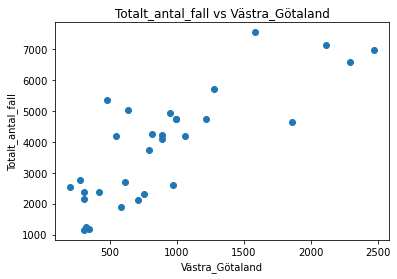

<Figure size 432x288 with 0 Axes>

In [350]:
plt.scatter(df.Skåne, df.Totalt_antal_fall)
plt.title('Totalt_antal_fall vs Västra_Götaland')
plt.xlabel('Västra_Götaland')
plt.ylabel('Totalt_antal_fall')
plt.show()
sns.despine()

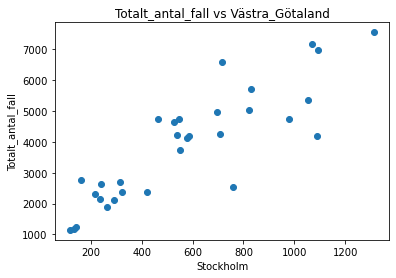

<Figure size 432x288 with 0 Axes>

In [351]:
plt.scatter(df.Stockholm, df.Totalt_antal_fall)
plt.title('Totalt_antal_fall vs Västra_Götaland')
plt.xlabel('Stockholm')
plt.ylabel('Totalt_antal_fall')
plt.show()
sns.despine()

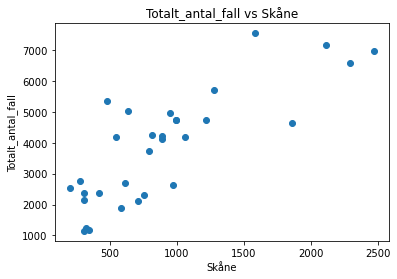

<Figure size 432x288 with 0 Axes>

In [352]:
plt.scatter(df.Skåne, df.Totalt_antal_fall)
plt.title('Totalt_antal_fall vs Skåne')
plt.xlabel('Skåne')
plt.ylabel('Totalt_antal_fall')
plt.show()
sns.despine()

In [353]:
df.Västra_Götaland.value_counts()

985     1
924     1
716     1
725     1
2056    1
651     1
501     1
975     1
400     1
1170    1
404     1
789     1
278     1
1181    1
153     1
413     1
1278    1
847     1
673     1
485     1
808     1
554     1
939     1
813     1
432     1
1329    1
755     1
949     1
310     1
439     1
770     1
Name: Västra_Götaland, dtype: int64

(31, 24)

In [354]:
# Importing another dataset
df_åldersgrupp = pd.read_excel('./Totalt_antal_per_åldersgrupp.xlsx')
df_åldersgrupp.head()


,ID,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,1,Ålder_0_9,8989,22,7
1,2,Ålder_10_19,61616,35,3
2,3,Ålder_20_29,107303,141,15
3,4,Ålder_30_39,106746,193,32
4,5,Ålder_40_49,109191,480,80


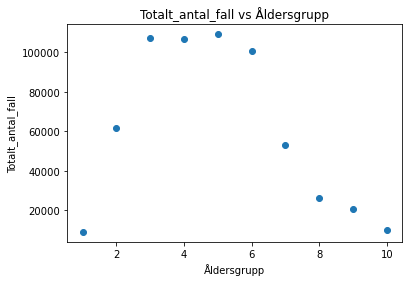

<Figure size 432x288 with 0 Axes>

In [355]:
plt.scatter(df_åldersgrupp.ID, df_åldersgrupp.Totalt_antal_fall)
plt.title('Totalt_antal_fall vs Åldersgrupp')
plt.xlabel('Åldersgrupp')
plt.ylabel('Totalt_antal_fall')
plt.show()
sns.despine()

In [356]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

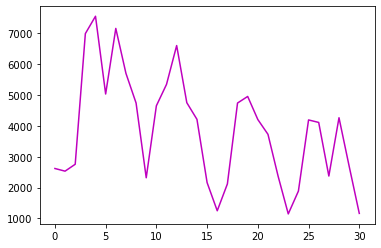

In [400]:
#Print('-'*30); print('PREPARE DATA'); print('-'*30)
x = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Totalt_antal_fall']).reshape(-1, 1)
plt.plot(y, '-m')
plt.show()

In [466]:
#polyfeet = PolynomialFeatures(degree=3)
#x = polyfeet.fit_transform(x)
#print(x)

In [467]:
# Split data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Preparing a DataFrame for model analysis

In [468]:
models = pd.DataFrame(index=['train_rmse', 'test_rmse'], 
                      columns=['NULL', 'MLR', 'KNN', 'LASSO'])

###  Null model: 

In [469]:
y_pred_null = y_train.mean()
models.loc['train_rmse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train, squared=False)
models.loc['test_rmse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test, squared=False)

### A. Multiple Linear Regression

In [470]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use the trainning data to train the estimator
linear_regression.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_rmse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(X_train), y_true=y_train, squared=False)

models.loc['test_rmse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(X_test), y_true=y_test, squared=False)

###  B. K-Nearest Neighbors Model

In [471]:
## 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_rmse','KNN'] = mean_squared_error(y_pred=knn.predict(X_train), 
                                                    y_true=y_train, squared=False)

models.loc['test_rmse','KNN'] = mean_squared_error(y_pred=knn.predict(X_test), 
                                                   y_true=y_test, squared=False)

### C. Lasso

In [472]:
# 1. Import the estimator object (model)
from sklearn.linear_model import Lasso
# 2. Create an instance of the estimator
lasso = Lasso(alpha=0.0001)
# 3. Use the trainning data to train the estimator
lasso.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_rmse','LASSO'] = mean_squared_error(y_pred=lasso.predict(X_train), 
                                                    y_true=y_train, squared=False)

models.loc['test_rmse','LASSO'] = mean_squared_error(y_pred=lasso.predict(X_test), 
                                                   y_true=y_test, squared=False)

In [473]:
models

,NULL,MLR,KNN,LASSO
train_rmse,1826.79,1697.25,0,1697.25
test_rmse,1606.54,1283.43,1080.15,1283.43


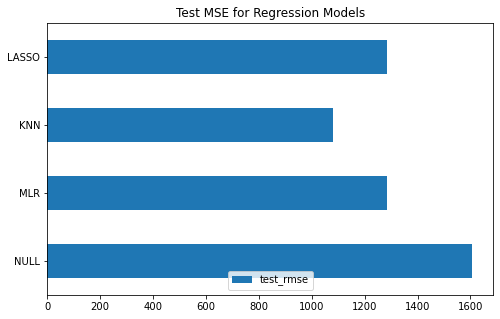

In [474]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['test_rmse'].plot(kind='barh', ax=ax)
ax.set_title('Test MSE for Regression Models')
ax.legend(loc=8, ncol=4);

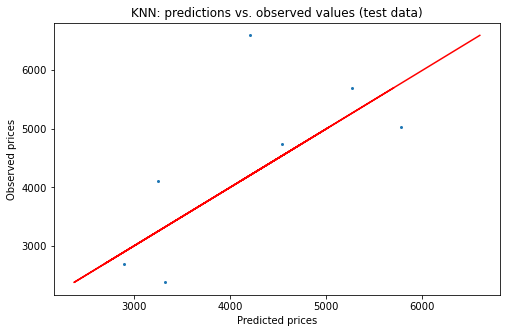

In [475]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted prices')
ax.set_ylabel('Observed prices');

In [490]:
# Re-training with all the observations
knn_final = KNeighborsRegressor(n_neighbors=3, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn_final.fit(X, y)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=3,
                    weights='distance')

In [495]:
# Making predictions
Nya_Faller = OrderedDict([('ID',363)])
Nya_Faller = pd.Series(Nya_Faller).values.reshape(1,-1)

In [496]:
knn_final.predict(Nya_Faller)

array([[1165.]])